# Predicting Customer Attrition for Beta Bank: A Data-Driven Retention Strategy

## Introduction 

Customer retention is a critical focus for businesses, especially in highly competitive industries like banking. Beta Bank is currently facing a challenge with customer attrition, as customers are steadily leaving the bank over time. Research has shown that retaining existing customers is more cost-effective than acquiring new ones, making it vital to identify at-risk customers early and take preventive measures.

In this project, we aim to build a predictive model that identifies customers likely to leave the bank based on their past behavior and contract termination history. The primary objective is to achieve the highest possible F1 score, with a minimum threshold of 0.59 to meet project requirements. Additionally, we will evaluate the model's performance using the AUC-ROC metric and compare it with the F1 score to ensure robust and reliable predictions. By leveraging data-driven insights, this project will empower Beta Bank to enhance its retention strategies and reduce customer churn effectively.

In [541]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


In [542]:
df = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project8/Churn.csv')

In [543]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [544]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


909 customers didn't have a fixed deposit or weren't required to have one. I'm going to leave the 909 rows in the dataset.

In [546]:
from ydata_profiling import ProfileReport


In [547]:
profile = ProfileReport(df, title='Customer Retention Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [548]:
df.duplicated().sum()

0

In [549]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [550]:
df[df['Tenure'].isnull()].reset_index(drop=True)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           31    15589475    Azikiwe          591     Spain  Female   39   
1           49    15766205        Yin          550   Germany    Male   38   
2           52    15768193  Trevisani          585   Germany    Male   36   
3           54    15702298   Parkhill          655   Germany    Male   41   
4           61    15651280     Hunter          742   Germany    Male   35   
..         ...         ...        ...          ...       ...     ...  ...   
904       9945    15703923    Cameron          744   Germany    Male   41   
905       9957    15707861      Nucci          520    France  Female   46   
906       9965    15642785    Douglas          479    France    Male   34   
907       9986    15586914     Nepean          659    France    Male   36   
908      10000    15628319     Walker          792    France  Female   28   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       NaN       0.00              3          1               0   
1       NaN  103391.38              1          0               1   
2       NaN  146050.97              2          0               0   
3       NaN  125561.97              1          0               0   
4       NaN  136857.00              1          0               0   
..      ...        ...            ...        ...             ...   
904     NaN  190409.34              2          1               1   
905     NaN   85216.61              1          1               0   
906     NaN  117593.48              2          0               0   
907     NaN  123841.49              2          1               0   
908     NaN  130142.79              1          1               0   

     EstimatedSalary  Exited  
0          140469.38       1  
1           90878.13       0  
2           86424.57       0  
3          164040.94       1  
4           84509.57       0  
..               ...     ...  
904        138361.48       0  
905        117369.52       1  
906        113308.29       0  
907         96833.00       0  
908         38190.78       0  

[909 rows x 14 columns]

In [551]:
df = df.dropna()

Dropping Tenure data because Tenure doesn't have any strong correlation to any other columns and I don't want to fill those empty spaces with 0s.

In [552]:
df.shape
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9994       9995    15719294       Wood          800    France  Female   29   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0       0.00              1          1               1   
1        1.0   83807.86              1          0               1   
2        8.0  159660.80              3          1               0   
3        1.0       0.00              2          0               0   
4        2.0  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9994     2.0       0.00              2          0               0   
9995     5.0       0.00              2          1               0   
9996    10.0   57369.61              1          1               1   
9997     7.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9994        167773.55       0  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  

[9091 rows x 14 columns]

In [553]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [554]:
df_ohe = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [555]:
df_ohe.shape
df_ohe

RowNumber  CustomerId    Surname  CreditScore  Age  Tenure    Balance  \
0             1    15634602   Hargrave          619   42     2.0       0.00   
1             2    15647311       Hill          608   41     1.0   83807.86   
2             3    15619304       Onio          502   42     8.0  159660.80   
3             4    15701354       Boni          699   39     1.0       0.00   
4             5    15737888   Mitchell          850   43     2.0  125510.82   
...         ...         ...        ...          ...  ...     ...        ...   
9994       9995    15719294       Wood          800   29     2.0       0.00   
9995       9996    15606229   Obijiaku          771   39     5.0       0.00   
9996       9997    15569892  Johnstone          516   35    10.0   57369.61   
9997       9998    15584532        Liu          709   36     7.0       0.00   
9998       9999    15682355  Sabbatini          772   42     3.0   75075.31   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9994              2          0               0        167773.55       0   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   

      Geography_Germany  Geography_Spain  Gender_Male  
0                     0                0            0  
1                     0                1            0  
2                     0                0            0  
3                     0                0            0  
4                     0                1            0  
...                 ...              ...          ...  
9994                  0                0            0  
9995                  0                0            1  
9996                  0                0            1  
9997                  0                0            0  
9998                  1                0            1  

[9091 rows x 15 columns]

In [556]:
target = df_ohe['Exited']

Looking at the balance of the 'Exited' column...

In [557]:
target.value_counts()

Exited
0    7237
1    1854
Name: count, dtype: int64

In [558]:
features = df_ohe.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Geography_Germany  9091 non-null   int64  
 9   Geography_Spain    9091 non-null   int64  
 10  Gender_Male        9091 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 852.3 KB


Split data into train, validation and test sets

In [559]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.3, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
features_train.shape, features_valid.shape, features_test.shape, target_train.shape, target_valid.shape, target_test.shape

((6363, 11), (1364, 11), (1364, 11), (6363,), (1364,), (1364,))

In [560]:
features_valid.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
5873          598   40     9.0       0.00              1          1   
9904          690   36    10.0   91760.11              1          1   
3953          652   33     3.0  124832.51              1          1   
4017          811   46     9.0  180226.24              1          1   
1657          704   54     6.0  133656.91              3          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5873               0         68462.59                  0                0   
9904               1        135784.94                  0                1   
3953               0        195877.06                  0                1   
4017               0         13464.64                  0                0   
1657               0        145071.33                  1                0   

      Gender_Male  
5873            0  
9904            0  
3953            0  
4017            1  
1657            0

Instantiate the model we want to use

In [561]:
model_rf = RandomForestClassifier(random_state=12345)

In [562]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')

In [563]:
model_gb = GradientBoostingClassifier(random_state=12345)

In [564]:
model_dt = DecisionTreeClassifier(random_state=12345)

Train the model

In [565]:
model_rf.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [566]:
model_log.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [567]:
model_gb.fit(features_train, target_train)

GradientBoostingClassifier(random_state=12345)

In [568]:
model_dt.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

Get predictions of the model

In [569]:
target_pred_rf = model_rf.predict(features_valid)

In [570]:
target_pred_log = model_log.predict(features_valid)

In [571]:
target_pred_gb = model_gb.predict(features_valid)

In [572]:
target_pred_dt = model_dt.predict(features_valid)

In [573]:
f1_scores_rf = f1_score(target_valid, target_pred_rf)
f1_scores_rf

0.5576036866359447

In [574]:
f1_scores_log = f1_score(target_valid, target_pred_log)
f1_scores_log

0.06734006734006734

In [575]:
f1_scores_gb = f1_score(target_valid, target_pred_gb)
f1_scores_gb

0.581986143187067

In [576]:
f1_scores_dt = f1_score(target_valid, target_pred_dt)
f1_scores_dt

0.49458483754512633

Out of the 4 types of models that I tried, none of them appear to have a score of 59% or higher. I will now try to adjust the hyperparamaters of the best model which is gradient boosting.


In [ ]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
}

In [ ]:
for key, value in pipelines.items():
    print(key, type(value))

rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [ ]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3 , 5]
}

In [ ]:
hyperparameter_grids = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [ ]:
for key in ['gb', 'rf']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

gb was found, and it is a grid.
rf was found, and it is a grid.


In [ ]:
models = {}

for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)


models.keys()

dict_keys(['rf', 'gb'])

In [ ]:
for key in models.keys():
    models[key].fit(features_train, target_train)
    print(key, 'is trained and tuned')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator

rf is trained and tuned
gb is trained and tuned


In [ ]:
for key in models:
    probs = models[key].predict_proba(features_valid)[:, 1]
    preds = (probs > 0.5).astype(int)
    print(key)
    print('F1 Score:' , round(f1_score(target_valid, preds), 3))
    print('AUC-ROC: ', round(roc_auc_score(target_valid, probs), 3))
    print('---')

rf
F1 Score: 0.556
AUC-ROC:  0.856
---
gb
F1 Score: 0.582
AUC-ROC:  0.87
---


The AUC-ROC scores are much better than the F1 Scores. I will use the Gradient Boosting model to test the test data.

In [ ]:
# Make prediction with test data
probs = models['gb'].predict_proba(features_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(target_test, preds)
conf_matrix

array([[964, 126],
       [239,  35]])

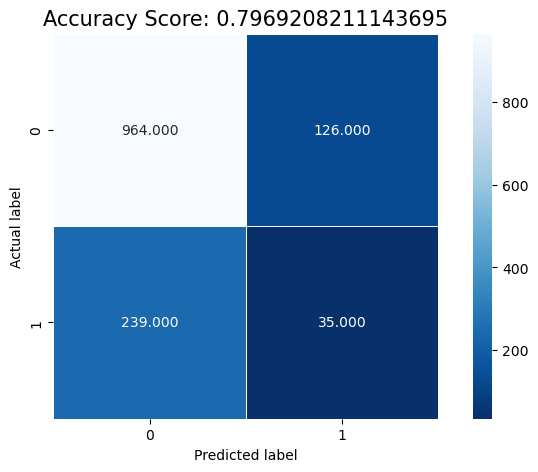

In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

The models predicts with about 80% accuracy but has some trouble with the minority class (1)

In [580]:
acc = model_gb.score(features_test, target_test)
print(acc)

0.8636363636363636


In [ ]:
probs_class_1 = probs[:, 1]

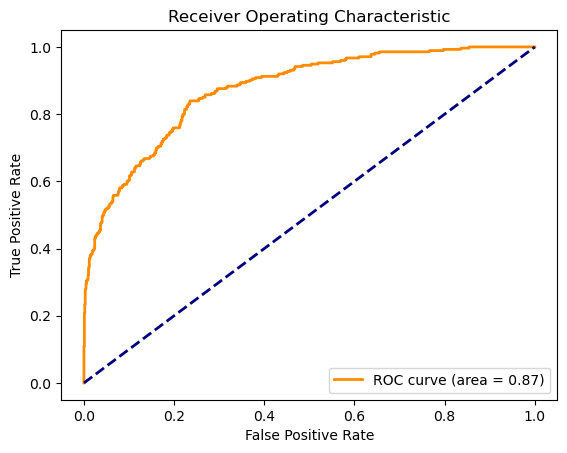

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probs_class_1)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

The analysis demonstrates that the model performs well in distinguishing between at-risk and retained customers, as evidenced by the AUC-ROC score of 0.87. This high AUC value indicates that the model has strong discriminatory power, making it effective for predicting customer attrition. By incorporating both the F1 score and the AUC-ROC curve, we have ensured a robust and reliable approach for Beta Bank to identify at-risk customers and implement timely retention strategies.